# Naive Bayes

Purpose of this tutorial is to explain the following:

1. Pair Distribution Plot for Multivariate Data
2. Interactive Plot
3. Implementation of Naive Bayes
4. Interactive Plot of Decision Boundary

Naive Bayes is very popular machine learning algorithm. It implements Bayes Rule to find posterior probability from the prior probability. It is a generative model. Logistic regression, on the otherhand, is a discriminative model. Please refer the lecture notes for more detail.

In [47]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [48]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import subplots
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import plotly.express as exp

In [49]:
data = load_iris()
df_X = pd.DataFrame(data=data['data'],columns = ["Sepal Length","Sepal Width","Petal Length","Petal Width"])
df_Y = pd.DataFrame(data=data['target'],columns=["Species"])
df_X.head()



,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
df_Y.head()


,Species
0,0
1,0
2,0
3,0
4,0


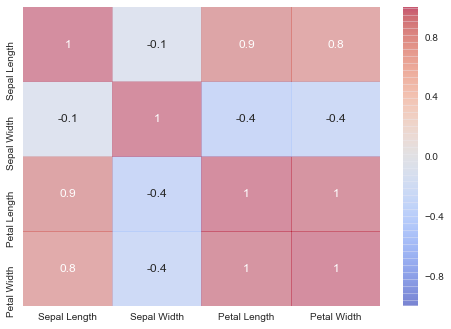

In [51]:
sb.heatmap(df_X.corr(),annot=True,fmt=".1g",cmap="coolwarm",alpha=0.4)
plt.show()

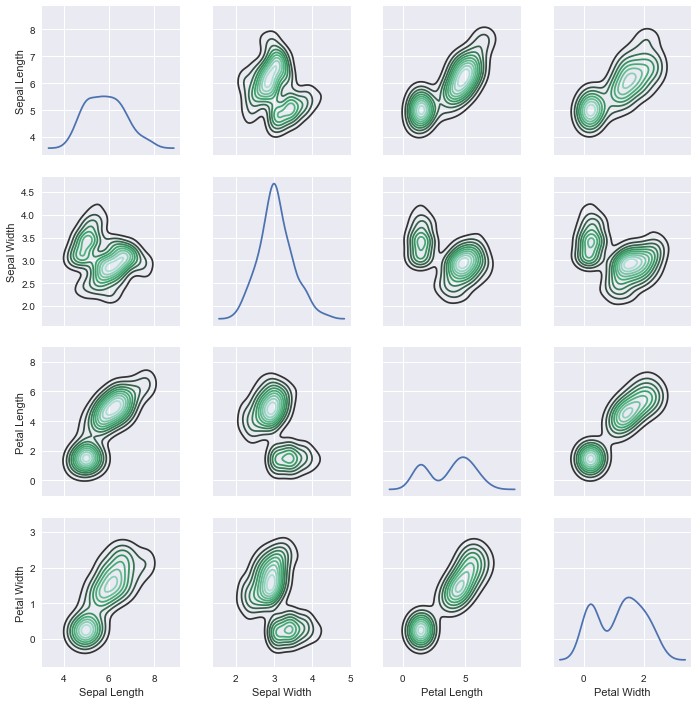

In [52]:
g=sb.PairGrid(df_X)
g.map_upper(sb.kdeplot)
g.map_lower(sb.kdeplot)
g.map_diag(sb.kdeplot)
plt.show()

In [53]:
species_name = {0:"Setosa",1:"Versicolor",2:"Virginica"}
df_Y1=df_Y["Species"].map(species_name)
df_Y1 = pd.DataFrame(data=df_Y1,columns=["Species"])
df_plotly=df_X.join(df_Y1)
df_plotly.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [54]:
fig=exp.scatter(df_plotly,x="Sepal Width",
                y="Sepal Length",
                color="Species",
                marginal_y="violin",
                marginal_x="box",
                trendline="ols",
                template="simple_white")
fig.show()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y, test_size=0.40, random_state=42)
GNBclassifier = GaussianNB()
GNBclassifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred_GNB = GNBclassifier.predict(X_test)
# evaluate accuracy
print(f"The accuracy of Gaussian Naive Bayes Classifier is {np.round(accuracy_score(y_test, y_pred_GNB)*100,2)}")

The accuracy of Gaussian Naive Bayes Classifier is 96.67


In [56]:
X = df_X.iloc[:, :2]  # Take only the first two features.
               
y = df_Y["Species"]
h = .02  # step size in the mesh

X = StandardScaler().fit_transform(X)

#Naive Bayes Classifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.40, random_state=42)
GNBclassifier = GaussianNB()
GNBclassifier.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h)
                     , np.arange(y_min, y_max, h))
y_ = np.arange(y_min, y_max, h)

Z = GNBclassifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = subplots.make_subplots(rows=1, cols=2,
                          subplot_titles=("Naive Bayes Classifier")
                         )

trace1 = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

trace2 = go.Scatter(x=X[:, 0], y=X[:, 1], 
                    mode='markers',
                    showlegend=False,
                    marker=dict(size=10,
                                color=y, 
                                colorscale='Viridis',
                                line=dict(color='black', width=1))
                    )
                  
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)


for i in map(str, range(1, 2)):
    x = 'xaxis' + i
    y = 'yaxis' + i
    fig['layout'][x].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)
    fig['layout'][y].update(showgrid=False, 
                            zeroline=False,
                            showticklabels=False, 
                            ticks='', 
                            autorange=True)

py.iplot(fig,filename="Decision_Boundary_Naive")



#### References: 

1. Naive Bayes
   http://pages.cs.wisc.edu/~jerryzhu/cs769/nb.pdf